In [4]:
import pandas as pd
df = pd.read_csv("laptop.csv")
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [8]:
df.shape

(3976, 18)

In [10]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [14]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ","_")
    .str.replace(":","")
)
df.columns

Index(['Unnamed_0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [18]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(',','')
    .str.replace('₹','')
)
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [20]:
df.isnull().sum()

Unnamed_0            0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [22]:
df.drop(columns=['Unnamed_0'], inplace=True)


In [26]:
df['GPU'] = df['GPU'].fillna('Integrated')
df['GPU_Brand'] = df['GPU_Brand'].fillna('Integrated')


In [30]:
df.isnull().sum()

Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  0
GPU_Brand            0
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [34]:
# Laptop Data Analysis Project
#This project analyzes laptop specifications to understand how different components impact price and performance.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()

In [38]:
df = pd.read_csv("laptop.csv")

In [40]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [42]:
df.shape

(3976, 18)

In [44]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [48]:
df.describe()

,Unnamed: 0,Price
count,3976.000000,3976.000000
mean,2181.495724,72432.528672
std,1297.029657,52207.650948
min,0.000000,7990.000000
25%,1058.750000,39873.250000
50%,2098.500000,58990.000000
75%,3342.250000,84990.000000
max,4408.000000,503890.000000


In [50]:
#The dataset contains 3,976 laptop records.
#It includes both categorical and numerical features.
#Price and Battery Life are key numerical attributes.


In [52]:
df.drop(columns=['Sr No.', 'Unnamed: 0'], errors='ignore', inplace=True)


In [54]:
df.isnull().sum()


Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [56]:
df['GPU'] = df['GPU'].fillna('Integrated')
df['GPU_Brand'] = df['GPU_Brand'].fillna('Integrated')


In [60]:
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)


In [62]:
df.isnull().sum()


Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  0
GPU_Brand            0
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [64]:
#Top Laptop brands
df['Brand'].value_counts().head(10)

Brand
ASUS         989
Lenovo       811
HP           803
Dell         420
Acer         322
MSI          316
Samsung       61
Apple         49
Infinix       39
Microsoft     34
Name: count, dtype: int64

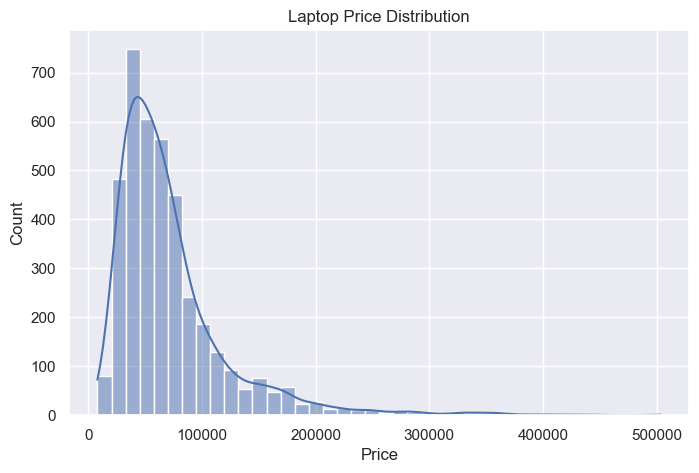

In [66]:
#Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Laptop Price Distribution")
plt.show()

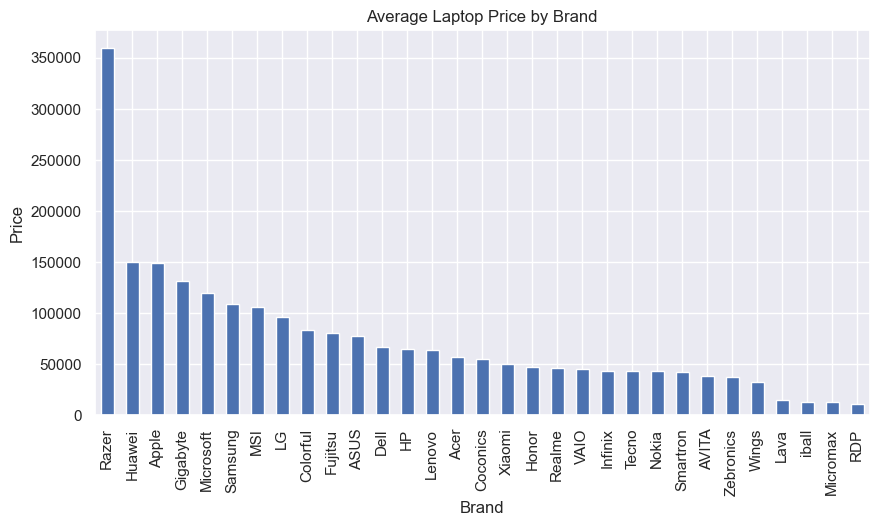

In [68]:
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
brand_price.plot(kind='bar')
plt.title("Average Laptop Price by Brand")
plt.ylabel("Price")
plt.show()


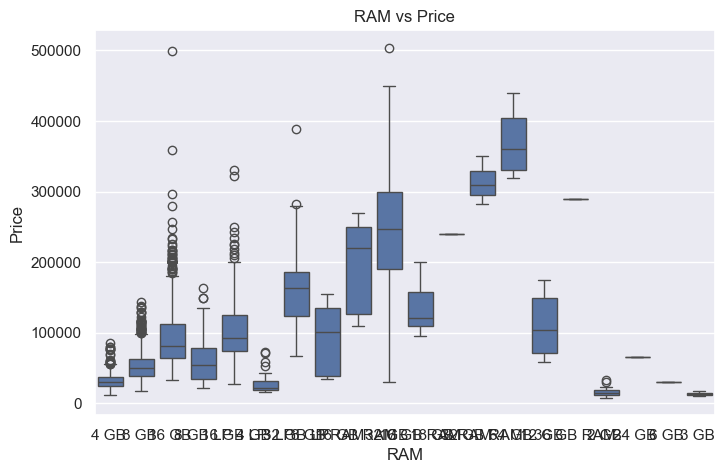

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(x='RAM',y='Price',data=df)
plt.title('RAM vs Price')
plt.show()

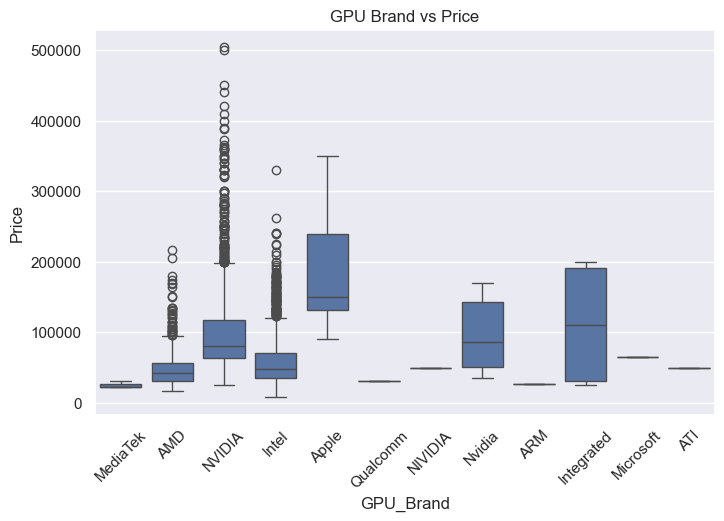

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x='GPU_Brand',y='Price',data=df)
plt.title('GPU Brand vs Price')
plt.xticks(rotation=45)
plt.show()

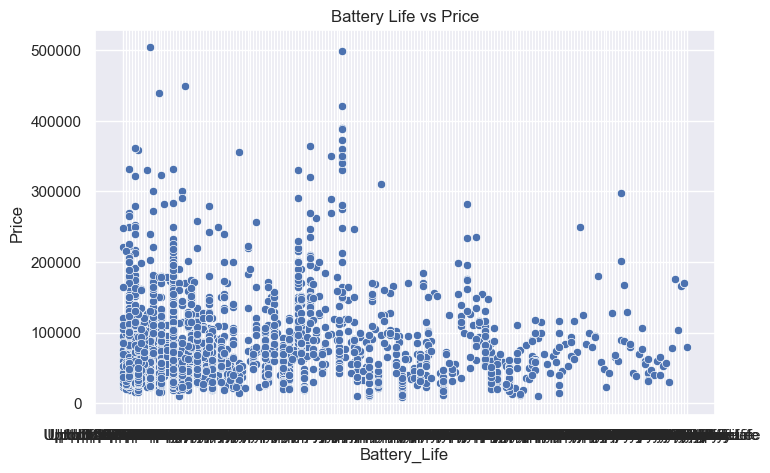

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Battery_Life',y='Price',data=df)
plt.title('Battery Life vs Price')
plt.show()

In [84]:
### Key Insights:
#Laptops with dedicated GPUs are significantly more expensive.
#Higher RAM generally leads to higher prices.
#Battery life does not strongly correlate with price.
#Premium brands maintain higher average prices.


In [86]:
df[df['Price']<50000][['Brand', 'Name', 'RAM', 'Price']].head()

,Brand,Name,RAM,Price
0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,4 GB,22990.0
1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,8 GB,36289.0
4,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,8 GB LP,21990.0
5,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,16 GB,34990.0
6,HP,HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AM...,8 GB,49599.0


In [92]:
df['RAM_clean'] = (
    df['RAM']
    .str.extract(r'(\d+)')   # extract number
    .astype(float)          # convert to numeric
)


In [94]:
df[['RAM', 'RAM_clean']].head(10)


,RAM,RAM_clean
0,4 GB,4.0
1,8 GB,8.0
2,16 GB,16.0
3,8 GB,8.0
4,8 GB LP,8.0
5,16 GB,16.0
6,8 GB,8.0
7,8 GB,8.0
8,4 GB,4.0
9,8 GB,8.0


In [98]:
df[(df['GPU_Brand'] != 'Integrated') & (df['RAM_clean'] >= 16)][['Brand' , 'Name', 'Price']]

,Brand,Name,Price
2,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500.0
5,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,34990.0
10,Lenovo,Lenovo LOQ 15APH8 (82XT004JIN) Laptop (15.6 In...,92990.0
12,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,104990.0
14,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,112980.0
...,...,...,...
3965,ASUS,ASUS ROG Strix Scar 17 G732LXS-HG010T Laptop (...,180990.0
3967,HP,HP Omen 16-n0091AX (7K4X2PA) Laptop (16.2 Inch...,103990.0
3969,ASUS,ASUS Vivobook 16X K3605VC-MB951WS Laptop (16 I...,109990.0
3970,MSI,MSI GE73VR 7RF-086IN Laptop (17.3 Inch | Core ...,185990.0


In [100]:
df.sort_values(by='Battery_Life', ascending=False)[['Brand', 'Name', 'Battery_Life', 'Price']].head()


,Brand,Name,Battery_Life,Price
853,Lenovo,Lenovo Ideapad Slim 1 15AMN7 (82VG00JJIN) Lapt...,Upto 9.86 Hrs Battery Life,33990.0
2574,Lenovo,Lenovo ThinkPad E14 Gen 4 (21E3S06300) Laptop ...,Upto 9.4 Hrs Battery Life,65999.0
2578,Lenovo,Lenovo ThinkPad E14 Gen 4 (21E3S00P00) Laptop ...,Upto 9.4 Hrs Battery Life,67999.0
2042,Lava,Lava Helium 14 Laptop (14.1 Inch | Atom Quad C...,Upto 9 Hrs Battery Life,14999.0
3470,Microsoft,Microsoft Surface Pro 4 (CR3-00022) Laptop (12...,Upto 9 Hrs Battery Life,99990.0


In [ ]:
#This project demonstrates how laptop specifications influence pricing and performance.
#The analysis can help consumers choose laptops based on budget, performance, and battery needs.
